---

# **Latar Belakang**

---
Salah satu perusahaan yang menjadi vendor untuk TLC (Taxi and Limousine Commission) di Kota New York adalah VeriFone Inc. Perusahaan tersebut memfasilitasi pencatatan data setiap perjalanan taxi di kota tersebut.

Terdapat banyak area lokasi penjemputan penumpang di Kota New York, namun tidak semua lokasi tersebut selalu ramai dengan penumpang.

Stakeholder yang mengambil keputusan adalah Manajer VeriFone Inc.

## **Pernyataan Masalah**
Stakeholder ingin meningkatkan profit perusahaan dengan cara mengetahui area lokasi penjemputan penumpang manakah yang paling ramai di kota New York. Informasi ini akan membantu perusahaan untuk meningkatkan efektifitas penempatan taksi di area yang memiliki jumlah penjemputan tertinggi sehingga harapannya mampu meningkatkan profit perusahaan.

Sebagai seorang Data Analyst, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimanakah cara meningkatkan profit perusahaan dan meningkatkan efektifitas lokasi pickup customer?**

---

# Data

---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from matplotlib import cm
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.colors as mcolors

Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)

Terdapat 17 kolom di dalam dataset, yaitu:

1.   **VendorID** = vendor atau perusahaan yang bekerjasama dengan TLC.
    
    1 = Creative Mobile Technologies, LLC.  
    2= VeriFone Inc.

2.   **lpep_pickup_datetime** = tanggal dan waktu penjemputan/pickup penumpang.
3.   **lpep_dropoff_datetime** = tanggal dan waktu menurunkan penumpang.
4.   **store_and_fwd_flag** =
  *   Y: catatan perjalanan disimpan di memori kendaraan dan dikirim ke server kemudian (yaitu, perjalanan dengan metode "store and forward").
  *   N: Catatan perjalanan dikirim langsung ke server tanpa disimpan terlebih dahulu di perangkat memori kendaraan (tidak termasuk trip dengan metode "store and forward").

5.  **RatecodeID** =
    
    (1) Standard rate (Tarif standar)
    
    (2) JFK (Kode tarif untuk perjalanan dari atau ke Bandara Internasional John F. Kennedy)
    
    (3) Newark (Kode tarif untuk perjalanan dari atau ke Bandara Internasional Newark Liberty)
    
    (4) Nassau or Westchester (Kode tarif untuk perjalanan ke Nassau atau Westchester di New York)
    
    (5) Negotiated fare (Tarif yang ditawar)
    
    (6) Group ride (Perjalanan kelompok)


6.  **PULocationID** = Lokasi penjemputan penumpang.

7.  **DOLocationID** = Lokasi penurunan penumpang.

8.  **passenger_count** = jumlah penumpang di dalam kendaraan.

9. **trip_distance** = jarak tempuh perjalanan (satuan mil) dihitung menggunakan taximeter selama perjalanan berlangsung.

10. **fare_amount** =

  Jumlah tarif penumpang yang dihitung berdasarkan waktu dan jarak tempuh serta biaya tambahan lainnya seperti biaya pajak MTA sebesar 0.50 USD dan biaya sebesar 1 USD pada jam sibuk maupun jam tengah malam (overnight).
  
  MTA adalah sebuah badan transportasi yang bertanggung jawab atas sistem transportasi umum di daerah metropolitan di Amerika Serikat, termasuk di kota New York. Pada sistem transportasi tersebut, MTA tax sebesar $0,50 akan ditambahkan secara otomatis pada tarif taksi yang dihitung berdasarkan tarif meteran. Dalam hal ini, MTA tax merupakan biaya tambahan yang harus dibayar oleh pelanggan sebagai kontribusi untuk membiayai layanan transportasi umum di daerah tersebut.

11. **mta_tax** = Biaya tambahan yang dikenakan untuk mendukung layanan transportasi umum di daerah Metropolitan New York. Biaya tambahan sebesar $0,50 ini dikenakan pada setiap perjalanan taksi yang dilakukan di kota New York.

12. **tip_amount** = Jumlah tip diberikan oleh penumpang.

13. **tolls_amount** = jumlah biaya toll yang dibayarkan oleh penumpang.

14. **improvement_surcharge** = Biaya tambahan sebesar $0,30 yang dikenakan pada perjalanan taksi yang dipesan melalui sistem hail (mengangkat tangan sebagai tanda untuk memanggil taksi) pada saat penumpang naik ke dalam taksi.

15. **total_amount** = jumlah total biaya yang harus dibayar penumpang selama perjalanan taksi tidak termasuk tips.

16. **payment_type** = tipe pembayaran

    1 = Credit card
    
    2 = Cash
    
    3 = No charge
    
    4 = Dispute
    
    5 = Unknown
    
    6 = Voided trip

17. **trip_type** =    
    
    1 = Penumpang secara langsung memanggil taksi di pinggir jalan seperti melambaikan tangan tanpa memesan terlebih dahulu ke kantor pusat taksi.
    
    2 = Penumpang terlebih dahulu memesan ke kantor pusat taksi dan kantor pusat akan menentukan taksi terdekat dari penumpang yang memesan tersebut untuk segera dilakukan penjemputan.


Berikut 5 baris teratas dan terbawah dari dataset New York City TLC Trip Record.

In [ ]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

<ipython-input-258-e862c92c1d5e>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN



---

## Data Understanding and Cleaning

---

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset New York City TLC Trip Record.

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14


> Untuk memudahkan dalam melihat isi informasi secara umum, mari kita lakukan transpose dari kolom menjadi baris terlebih dahulu serta melihat secara keseluruhan isi dari tiap kolom.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


In [ ]:
df.describe(include=[object]).T

,count,unique,top,freq
lpep_pickup_datetime,68211,66575,2023-01-09 09:08:00,4
lpep_dropoff_datetime,68211,66519,2023-01-09 00:00:00,6
store_and_fwd_flag,63887,2,N,63579


> Selanjutnya, mari kita filter hanya pada data yang dibutuhkan oleh stackholder  dengan memilih VendorID = 2 (*VeriFone Inc.*) saja dan menghapus kolom `VendorID` dikarenakan tidak akan diperlukan lagi kedepannya. Selain itu, mari kita menghapus kolom `extra`, `ehail_fee`, dan `congestion_surcharge` karena tidak terdapat pada dictionary sehingga tidak relevan apabila digunakan.

In [ ]:
# Filter kolom VendorID = 2 ( VeriFone Inc.)
df = df[df['VendorID'] == 2]

# drop Variable VendorID, extra, ehail_fee, congestion_surcharge
df = df.drop(['VendorID','extra','ehail_fee','congestion_surcharge'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58868 entries, 0 to 68210
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   58868 non-null  object 
 1   lpep_dropoff_datetime  58868 non-null  object 
 2   store_and_fwd_flag     54672 non-null  object 
 3   RatecodeID             54672 non-null  float64
 4   PULocationID           58868 non-null  int64  
 5   DOLocationID           58868 non-null  int64  
 6   passenger_count        54672 non-null  float64
 7   trip_distance          58868 non-null  float64
 8   fare_amount            58868 non-null  float64
 9   mta_tax                58868 non-null  float64
 10  tip_amount             58868 non-null  float64
 11  tolls_amount           58868 non-null  float64
 12  improvement_surcharge  58868 non-null  float64
 13  total_amount           58868 non-null  float64
 14  payment_type           54672 non-null  float64
 15  trip_ty

##Check Duplicate Data

In [ ]:
df.duplicated().value_counts()

False    58868
Name: count, dtype: int64

Tidak terdapat data yang duplikat dari tiap kolom.

##Check Date Time Format



---


>Selanjutnya pada data terdapat informasi berupa *tanggal* pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime`, perlu dilakukan pengecekan apakah tipe datanya sudah datetime atau belum. Apabila masih belum, maka akan diubah menjadi format datetime dan check info setelahnya.



In [ ]:
# Check tipe data pada
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   lpep_pickup_datetime   58868 non-null  object
 1   lpep_dropoff_datetime  58868 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [ ]:
# Mengubah format menjadi Datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [ ]:
# melakukan pengecekan kembali apakah sudah menjadi format Datetime
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   58868 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  58868 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.3 MB


## Check Missing Value

In [ ]:
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4196
RatecodeID               4196
PULocationID                0
DOLocationID                0
passenger_count          4196
trip_distance               0
fare_amount                 0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4196
trip_type                4196
dtype: int64

In [ ]:
df.isna().sum()/df.shape[0]*100

lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       7.127811
RatecodeID               7.127811
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          7.127811
trip_distance            0.000000
fare_amount              0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             7.127811
trip_type                7.127811
dtype: float64

<Figure size 1000x400 with 0 Axes>

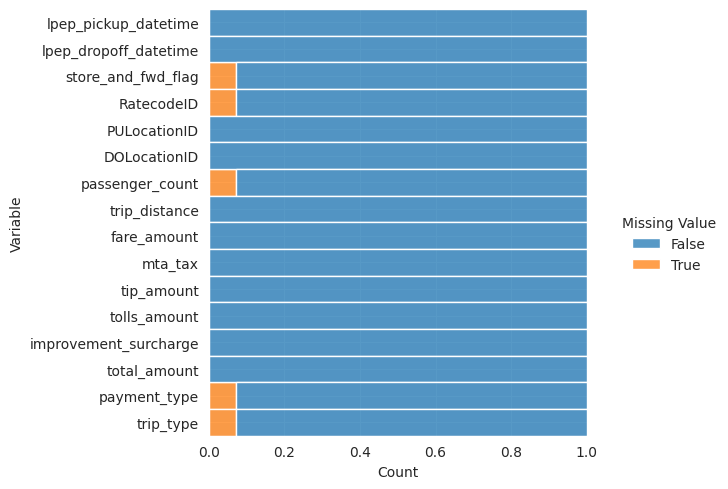

In [ ]:
# Melihat missing value menggunakan seaborn
plt.figure(figsize=(10,4))
mv = sns.displot(
    data=df.isna().melt(value_name="Missing Value"),
    y="variable",
    hue="Missing Value",
    multiple="fill",
    aspect=1.25
)

mv.set(ylabel='Variable')
plt.show()

<Axes: >

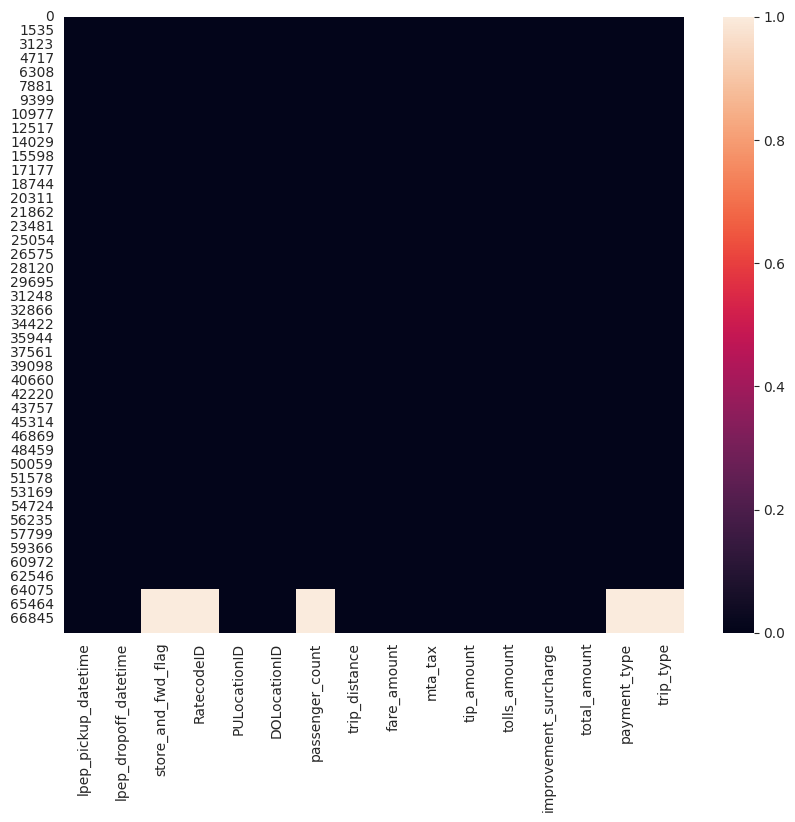

In [ ]:
# Melihat sebaran Missing Value di dalam data
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())

<Axes: >

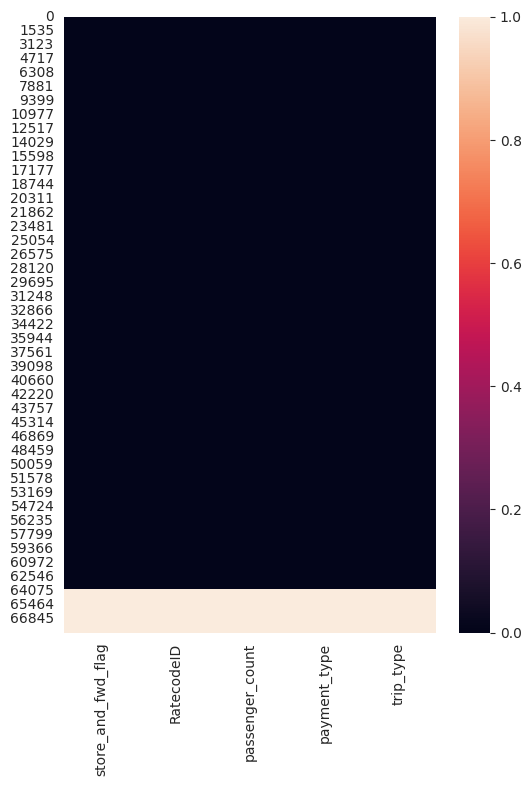

In [ ]:
# Melihat sebaran missing value secara detail dari 5 kolom yang memiliki Missing Value
plt.figure(figsize=(6,8))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type']].isna())

Secara garis besar didapatkan informasi:

*   Terdapat missing value pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type` dan `trip_type` dengan proporsi yang sedikit (<10%).


Terdapat 2 cara untuk menangani missing value::

1.   **Menghapus baris/kolom yang berisikan missing value**

      Cara ini dapat digunakan apabila proporsi missing value tergolong sedikit seperti pada case kali ini. Jika proporsi missing value relatif kecil dibandingkan dengan ukuran dataset, penghapusan missing value dapat meningkatkan akurasi analisisa data *sehingga pada case kali ini disarankan menggunakan cara pertama ini dalam menangani missing value*.

2.   **Mengisi missing value**
      
      Cara ini dapat digunakan apabila proporsi missing value tergolong tinggi, sehingga apabila menangani missing value menggunakan cara pertama (menghapus baris/kolom yang berisikan missing value) akan berdampak besar terhadap keakuratan analisa data.

      Terdapat beberapa metode yang bisa digunakan untuk mengisi missing value, seperti:

    *   Mengisi data yang hilang dengan nilai sebenarnya atau sedekat mungkin dengan nilai asli (secara domain knowledge atau secara statistik) yang berkaitan dengan kolom yang memiliki missing value.
    *   Jika masih terdapat kolom yang tidak terisi, mengisi dengan angka mean, median atau modus adalah opsi lainnya.

In [ ]:
# Menghapus data yang berisikan missing value (NaN)
df = df.dropna(axis=0)

In [ ]:
# Melakukan pengecekan data yang berisikan missing value (NaN)
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

### ratecodeID

In [ ]:
# Mengubah tipe data RatecodeID menjadi category
df['RatecodeID'] = df['RatecodeID'].replace({1: 'Standard rate', 2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5: 'Negotiated fare', 6: 'Group ride'})
df['RatecodeID'].value_counts()

RatecodeID
Standard rate            53001
Negotiated fare           1451
JFK                        144
Nassau or Westchester       50
Newark                      26
Name: count, dtype: int64

### payment_type

In [ ]:
# Mengubah tipe data payment_type menjadi category
df['payment_type'] = df['payment_type'].replace({1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'})
df['payment_type'].value_counts()

payment_type
Credit card    34572
Cash           19758
No charge        278
Dispute           64
Name: count, dtype: int64

### trip_type

In [ ]:
# Mengubah tipe data trip_type menjadi category
df['trip_type'] = df['trip_type'].replace({1: 'Street-hail', 2: 'Dispatch'})
df['trip_type'].value_counts()

trip_type
Street-hail    53332
Dispatch        1340
Name: count, dtype: int64

## Check Columns Format

In [ ]:
# Melakukan pengecekan kolom category pada data
column_category = [column for column in df.columns if df[column].dtype == "object" ]
column_category

['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']

In [ ]:
# Melakukan pengecekan jumlah kolom pada data
total_column = [column for column in df.columns if df[column].dtype == "float64" ] + [column for column in df.columns if df[column].dtype == "int64" ]
total_column

['passenger_count',
 'trip_distance',
 'fare_amount',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'PULocationID',
 'DOLocationID']

In [ ]:
display(df.head(),df.tail())

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail
1,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1.0,0.00,7.2,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
5,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail
7,2023-01-01 00:11:58,2023-01-01 00:24:55,N,Standard rate,24,75,1.0,1.88,14.2,0.5,0.00,0.0,1.0,16.70,Cash,Street-hail


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
63882,2023-01-31 23:09:22,2023-01-31 23:17:21,N,Negotiated fare,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch
63883,2023-01-31 23:06:18,2023-01-31 23:17:03,N,Standard rate,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail
63884,2023-01-31 23:17:03,2023-01-31 23:23:04,N,Standard rate,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail
63885,2023-01-31 23:29:18,2023-01-31 23:38:50,N,Standard rate,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail
63886,2023-01-31 23:00:12,2023-01-31 23:10:08,N,Standard rate,95,95,1.0,1.39,11.4,0.5,4.17,0.0,1.0,18.07,Credit card,Street-hail


<ipython-input-281-d85df59a3abf>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(total_column), i+1)
<ipython-input-281-d85df59a3abf>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(total_column), i+1)


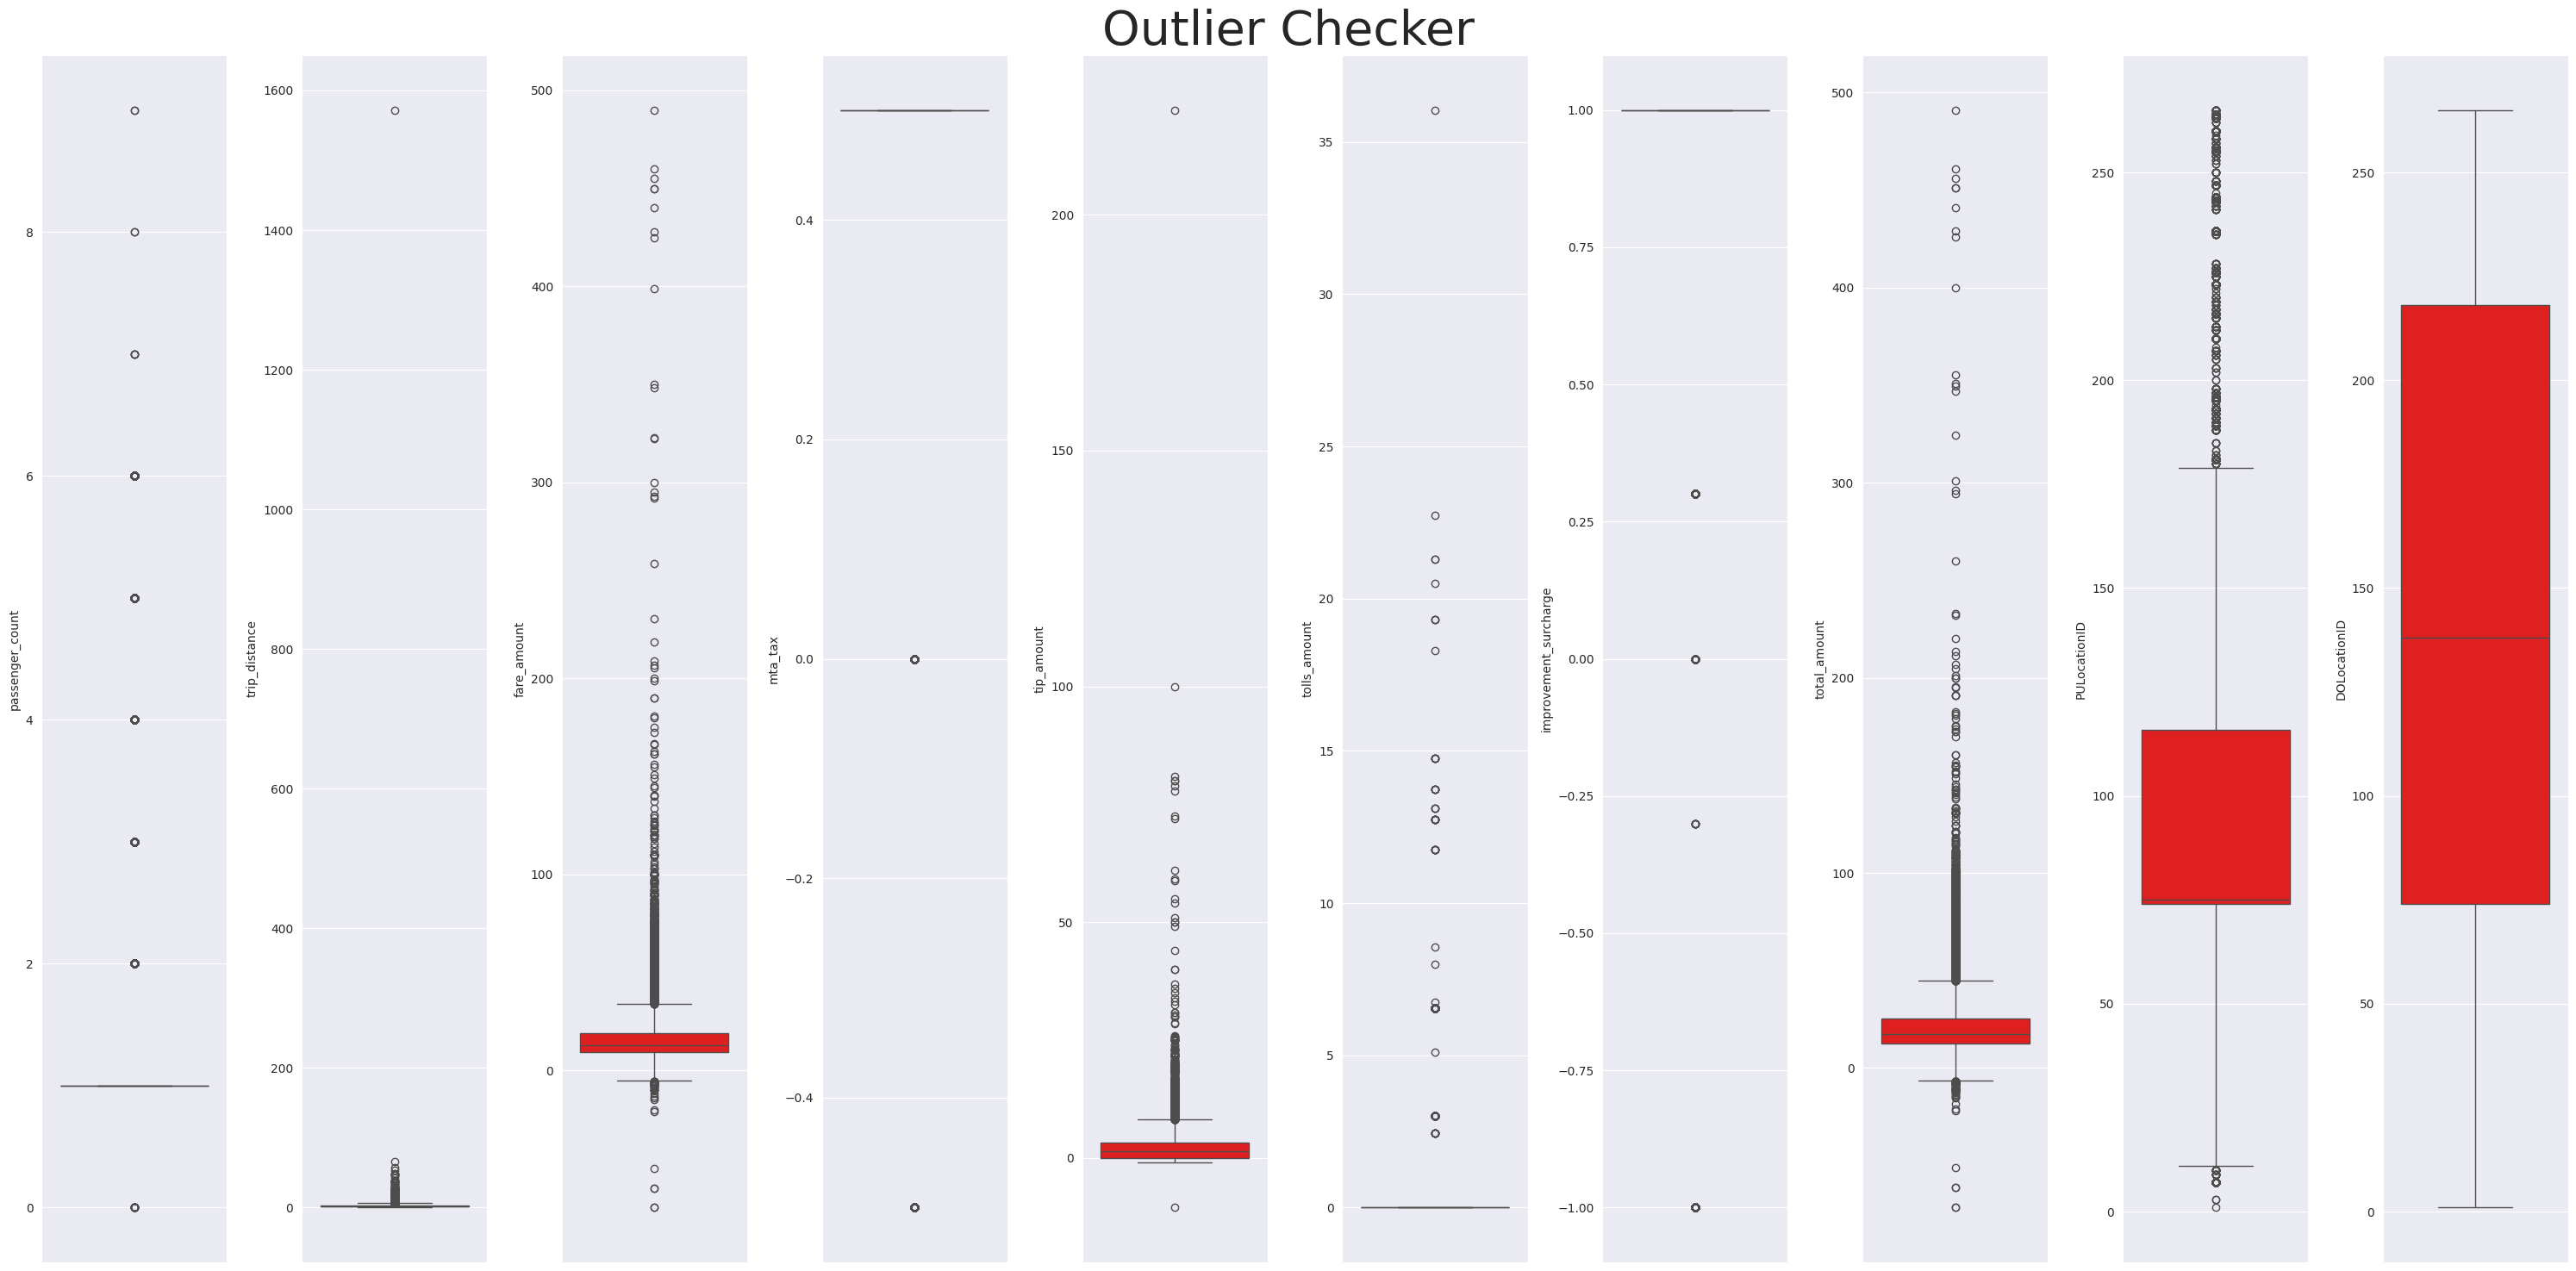

In [ ]:
# Pengecekan Outlier
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(30,15))
fig.suptitle('Outlier Checker',fontsize=40)

for i in range(0, len(total_column)):
    plt.subplot(1, len(total_column), i+1)
    sns.boxplot(y=df[total_column[i]], color = 'red', orient = 'v')
    plt.tight_layout()

Terdapat outlier di semua data numerical.

Tidak terdapat outlier pada `DOLocationID`, `PULocationID` yang merupakan data kategorik.

##Check Date Outlier

In [ ]:
# Buat kolom baru untuk month dan year
df['date'] = df['lpep_pickup_datetime'].dt.date
df['month'] = df['lpep_pickup_datetime'].dt.month
df['year'] = df['lpep_pickup_datetime'].dt.year

# Group berdasarkan year dan month, lalu count rows
daily_counts = df.groupby(['year', 'month', 'date']).size()

# Visualisasi count sebagai DataFrame
daily_counts_df = daily_counts.reset_index(name='count')

print(daily_counts_df)


    year  month        date  count
0   2009      1  2009-01-01      1
1   2022     12  2022-12-09      2
2   2023      1  2023-01-01   1125
3   2023      1  2023-01-02   1240
4   2023      1  2023-01-03   1670
5   2023      1  2023-01-04   1933
6   2023      1  2023-01-05   1926
7   2023      1  2023-01-06   2064
8   2023      1  2023-01-07   1776
9   2023      1  2023-01-08   1363
10  2023      1  2023-01-09   1791
11  2023      1  2023-01-10   1748
12  2023      1  2023-01-11   2006
13  2023      1  2023-01-12   1989
14  2023      1  2023-01-13   2029
15  2023      1  2023-01-14   1767
16  2023      1  2023-01-15   1446
17  2023      1  2023-01-16   1213
18  2023      1  2023-01-17   1807
19  2023      1  2023-01-18   1896
20  2023      1  2023-01-19   2063
21  2023      1  2023-01-20   1954
22  2023      1  2023-01-21   1731
23  2023      1  2023-01-22   1458
24  2023      1  2023-01-23   1896
25  2023      1  2023-01-24   1943
26  2023      1  2023-01-25   2134
27  2023      1  202

In [ ]:
# Group berdasarkan year dan month, lalu count rows
monthly_counts = df.groupby(['year', 'month']).size()

# Visualisasi count sebagai DataFrame
monthly_counts_df = monthly_counts.reset_index(name='count')

print(monthly_counts_df)

   year  month  count
0  2009      1      1
1  2022     12      2
2  2023      1  54668
3  2023      2      1


In [ ]:
month_to_keep = 1
year_to_keep = 2023

# Filter row untuk keep bulan dan tahun spesifik
df_filtered = df[(df['month'] == month_to_keep) & (df['year'] == year_to_keep)]

#replace filtered df to df
df = df_filtered

# Group berdasarkan year dan month, lalu count rows
monthly_counts = df.groupby(['year', 'month']).size()

# Visualisasi count sebagai DataFrame
monthly_counts_df = monthly_counts.reset_index(name='count')

print(monthly_counts_df)

   year  month  count
0  2023      1  54668


Dari Analisis diatas, didapatkan informasi:


*   Data yang tersedia sebelumnya memiliki beberapa tanggal yang merupakan outlier. Pada beberapa kasus, outlier tanggal dapat mempengaruhi relevansi data yang akan dianalisa, sehingga pada kasus ini hanya akan menggunakan data pada Januari 2023.

# Data Sudah Bersih

Data sudah berhasil dibersihkan.

Selanjutnya, data akan di export menjadi file Excel untuk keperluan visualisasi

In [ ]:
df.to_excel('NYC TLC Trip Record (Clean Data).xlsx', index=False)


---

# Data Analysis

---

Setelah membersihkan data, selanjutnya akan dilakukan analisis untuk mencari tahu **bagaimana cara meningkatkan profit perusahaan dan meningkatkan efektifitas lokasi pickup customer**.

Pertama lakukan pengecekan apakah terdapat anomali pada data tersebut seperti hal yang tidak sesuai dengan domain knowledge yang ada.

## Berdasarkan Total Amount yang Bernilai Negative

In [ ]:
total_Amount_Negative =  df[df['total_amount'] < 0]
print (len (total_Amount_Negative))
print (len (total_Amount_Negative)/len(df)*100)

174
0.3182849198800029


Pada umumnya, jika seorang pengemudi taksi melakukan pengantaran/trip, maka `total_amount` yang diperoleh tidaklah minus. Hal ini mengindikasikan terdapatnya anomali pada variable `total_amount`

In [ ]:
df['payment_type'].value_counts()

payment_type
Credit card    34570
Cash           19756
No charge        278
Dispute           64
Name: count, dtype: int64

In [ ]:
total_Amount_Negative['payment_type'].value_counts()

payment_type
No charge    139
Dispute       32
Cash           3
Name: count, dtype: int64

Trip yang bernilai negative dari variable `total_amount` terdapat pada metode pembayaran (`payment_type`):

*   No charge sekitar 80% dari total semua `payment_type`
*   Dispute sekitar 18% dari total semua `payment_type`
*   Cash sekitar 2% dari total semua `payment_type`

## Berdasarkan Lokasi Penumpang

In [ ]:
# Menentukan 5 lokasi penjemputan penumpang teramai
df_CustomerLoc = df['PULocationID'].value_counts().reset_index().rename(columns={'index':'PULocationID','PULocationID':'PULocationID'})
df_CustomerLoc.head()

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189


In [ ]:
# Banyaknya data lokasi penjemputan penumpang
len(df_CustomerLoc)

188

In [ ]:
# Dikarenakan data tidak berdistriibusi normal (terdapatnya banyak outlier), maka digunakan median.
df_CustomerLoc['count'].median()

11.0

In [ ]:
# Terdapat banyak lokasi yang kurang efisien karena hanya memiliki jumlah trip kurang dari 11.
dfTripLess11 = df_CustomerLoc[df_CustomerLoc['count']<11]
dfTripLess11 = dfTripLess11.groupby('count').count().reset_index().sort_values('PULocationID', ascending=False)
dfTripLess11['count'] = dfTripLess11['count'].astype(str)
dfTripLess11

,count,PULocationID
0,1,18
1,2,15
4,5,11
3,4,10
5,6,9
2,3,8
6,7,5
7,8,5
8,9,5
9,10,5


In [ ]:
# Untuk meningkatkan peluang mendapatkan penumpang, maka akan dilakukan filter lokasi yang memiliki jumlah trip lebih dari 11.

df_CustomerLoc['PULocationID'][df_CustomerLoc['count']>=11].sum()

13103

In [ ]:
loc_kurang11_total = df_CustomerLoc['PULocationID'][df_CustomerLoc['count']<11].count()
loc_Lebih11_total = df_CustomerLoc['PULocationID'][df_CustomerLoc['count']>=11].count()

df_locCust_greaterLess11 = pd.DataFrame({
    'location' : ['kurang dari 11','lebih dari 11'],
    'count' : [loc_kurang11_total, loc_Lebih11_total]
})

In [ ]:
df_locCust_greaterLess11

,location,count
0,kurang dari 11,91
1,lebih dari 11,97


<function matplotlib.pyplot.show(close=None, block=None)>

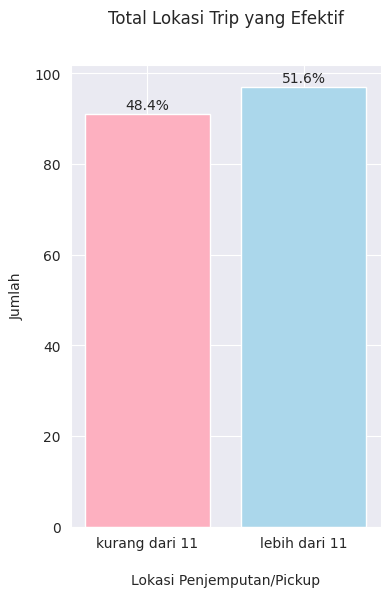

In [ ]:
sns.set_style('darkgrid')
colors = ['#FDB0C0','#ABD7EB']

plt.figure(figsize= (4, 6))
plt.title('Total Lokasi Trip yang Efektif',pad=30)
plt.xlabel('Lokasi Penjemputan/Pickup',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.15, 0.5)

plt.bar(df_locCust_greaterLess11['location'], df_locCust_greaterLess11['count'], color = colors)

total = sum(df_locCust_greaterLess11['count'])
for i, v in enumerate(df_locCust_greaterLess11['count']):
    percent = v / total * 100
    plt.text(i, v + 1, f'{percent:.1f}%', ha='center')

plt.show

Dari visualisasi total lokasi trip diatas, terdapat lokasi penjemputan yang kurang efektif (total jumlah penjemputan kurang dari 11) sebesar 48.4%.

In [ ]:
# Total lokasi penjemputan penumpang
df['PULocationID'].nunique()

188

In [ ]:
# Total lokasi penurunan penumpang
df['DOLocationID'].nunique()

245

In [ ]:
# Untuk meningkatkan peluang mendapatkan penumpang, kita fokuskan untuk 10 lokasi penjemputan teramai
df_Top10Loc =  df['PULocationID'].value_counts().head(10).reset_index().rename(columns={'index':'PULocationID','PULocationID':'PULocationID'})
df_Top10Loc['PULocationID'] = df_Top10Loc['PULocationID'].astype(str)
df_Top10Loc

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189
5,82,2643
6,43,2638
7,97,1847
8,7,1707
9,42,1304


In [ ]:
df['PULocationID'].value_counts().reset_index().rename(columns={'index':'PULocationID','PULocationID':'PULocationID'}).sum()

PULocationID    24838
count           54668
dtype: int64

In [ ]:
df_Top10Loc['count'].sum()

38638

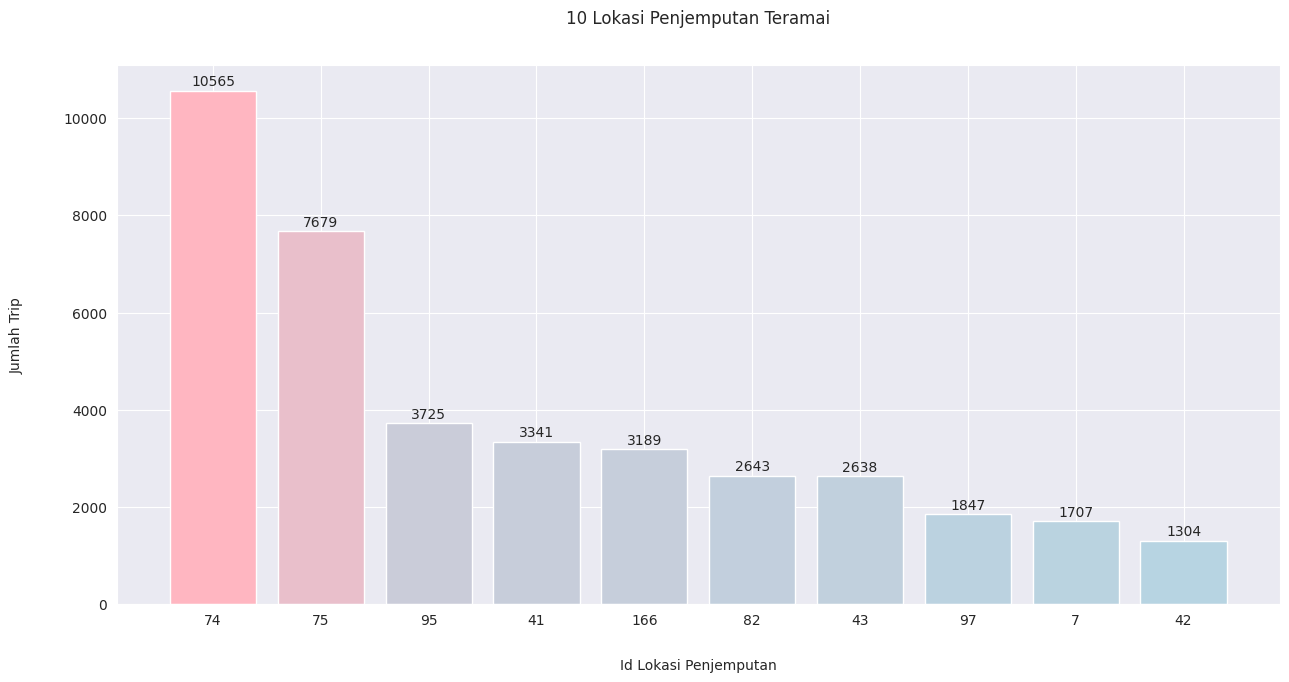

In [ ]:
sns.set_style('darkgrid')
normalized_heights = np.array(df_Top10Loc['count']) / max(df_Top10Loc['count'])
color_start = 'lightblue'
color_end = 'lightpink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (15, 7))
plt.title('10 Lokasi Penjemputan Teramai', pad=30)
plt.xlabel('Id Lokasi Penjemputan',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.bar(df_Top10Loc['PULocationID'], df_Top10Loc['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_Top10Loc['count']):
    plt.text(i, value + 100, str(value), ha='center')


plt.show()

Dari visualisasi diatas, didapatkan informasi:

Id Lokasi Penjemputan **74** merupakan jumlah trip tertinggi dengan jumlah trip sebanyak 10565 kali.


Rekomendasi:

*   Mengarahkan taxi dan driver taxi  ke lokasi penjemputan yang ramai untuk meningkatkan efektivitas trip sehingga dapat meningkatkan profit perusahaan.

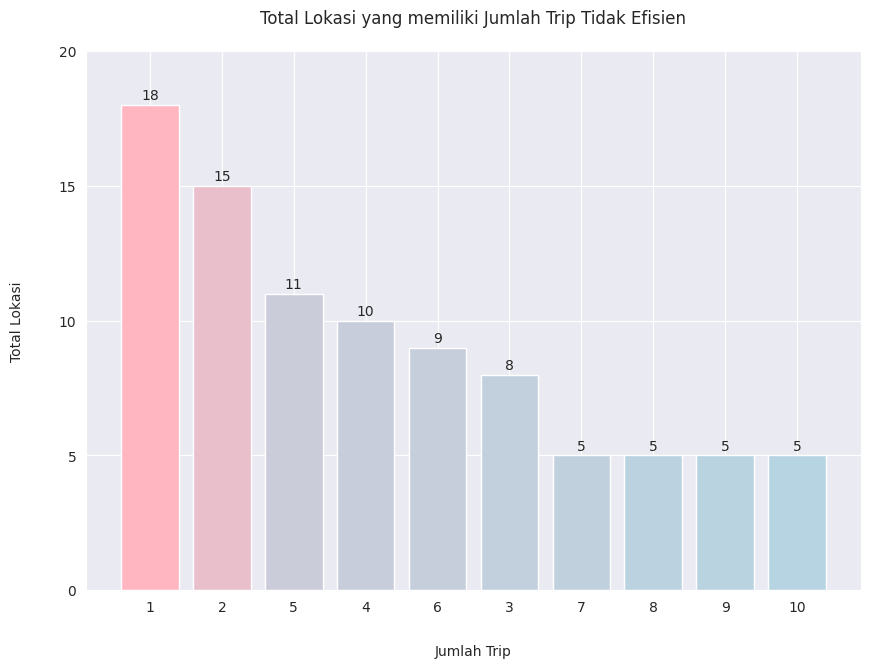

In [ ]:
sns.set_style('darkgrid')

normalized_heights = np.array(df_Top10Loc['count']) / max(df_Top10Loc['count'])
color_start = 'lightblue'
color_end = 'lightpink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (10, 7))
plt.title('Total Lokasi yang memiliki Jumlah Trip Tidak Efisien',pad=20)

plt.xlabel('Jumlah Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Lokasi',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.bar(dfTripLess11['count'], dfTripLess11['PULocationID'], color=cmap(normalized_heights))
plt.ylim(0, 20)
plt.yticks(range(0, 21, 5))
for i, value in enumerate(dfTripLess11['PULocationID']):
    plt.text(i, value +0.2, str(value), ha='center')

plt.show()

Dari visualisasi diatas, didapatkan informasi:


*   Terdapat sebanyak **18** lokasi berbeda yang hanya memiliki jumlah 1 trip, dimana hal tersebut dapat dikategorikan kurang efektif


Rekomendasi:
  
*   Menghindari lokasi area yang sepi penumpang untuk meningkatkan efektivitas trip dan profit perusahaan

## Berdasarkan Trip Type

In [ ]:
dfTripType = df['trip_type'].value_counts().reset_index().rename(columns={'index':'trip_type','trip_type':'trip_type'})

dfTripType

,trip_type,count
0,Street-hail,53329
1,Dispatch,1339


<function matplotlib.pyplot.show(close=None, block=None)>

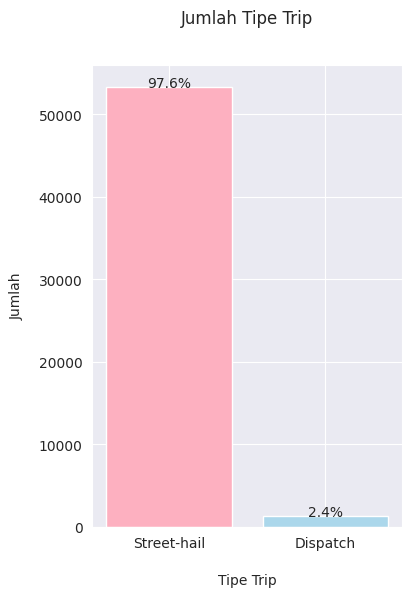

In [ ]:
sns.set_style('darkgrid')
colors = ['#FDB0C0','#ABD7EB']

plt.figure(figsize= (4, 6))
plt.title('Jumlah Tipe Trip',pad=30)
plt.xlabel('Tipe Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.22, 0.5)

plt.bar(dfTripType['trip_type'], dfTripType['count'], color = colors)

total = sum(dfTripType['count'])
for i, v in enumerate(dfTripType['count']):
    percent = v / total * 100
    plt.text(i, v + 1, f'{percent:.1f}%', ha='center')

plt.show

Dari visualisasi diatas, didapatkan informasi:


*   Jumlah Trip Dispatch sangat sedikit (2.4%) jika dibandingkan dengan Street-hail.

Rekomendasi:

*   Perusahaan harus mulai meningkatkan peforma dan kualitas aplikasi taxi persusahaan untuk menaikkan profit dan efesiensi.
*   Dengan meningkatkan peforma dan kualitas aplikasi taxi perusahaan juga akan bersaing ketat menarik customer dengan competitor, hal ini sangat direkomendasikan agar perusahaan mengikuti era teknologi sekarang dan dapat meningkatkan profit perusahaan.


## Berdasarkan Trip Distance

In [ ]:
tripDistance_0 = df[df['trip_distance'] == 0 ]
len(tripDistance_0)

1709

In [ ]:
tripDistance_0.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,date,month,year
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1.0,0.0,7.2,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail,2023-01-01,1,2023
58,2023-01-01 00:57:15,2023-01-01 01:00:15,N,Standard rate,75,75,1.0,0.0,4.4,0.5,1.38,0.0,1.0,8.28,Credit card,Street-hail,2023-01-01,1,2023
99,2023-01-01 01:27:36,2023-01-01 01:27:43,N,Negotiated fare,168,168,0.0,0.0,20.0,0.0,0.00,0.0,1.0,21.00,Credit card,Dispatch,2023-01-01,1,2023
107,2023-01-01 01:11:13,2023-01-01 01:11:36,N,Standard rate,7,7,1.0,0.0,3.0,0.5,9.00,0.0,1.0,14.50,Credit card,Street-hail,2023-01-01,1,2023
115,2023-01-01 01:52:58,2023-01-01 01:53:00,N,Standard rate,264,264,1.0,0.0,3.0,0.5,21.50,0.0,0.3,26.30,Credit card,Street-hail,2023-01-01,1,2023


In [ ]:
len(df)

54668

In [ ]:
df_tripDist0 = pd.DataFrame({
    'Trip_distance' : ['Trip Distance 0','Normal'],
    'count' : [len(tripDistance_0),len(df)]
})
df_tripDist0

,Trip_distance,count
0,Trip Distance 0,1709
1,Normal,54668


<function matplotlib.pyplot.show(close=None, block=None)>

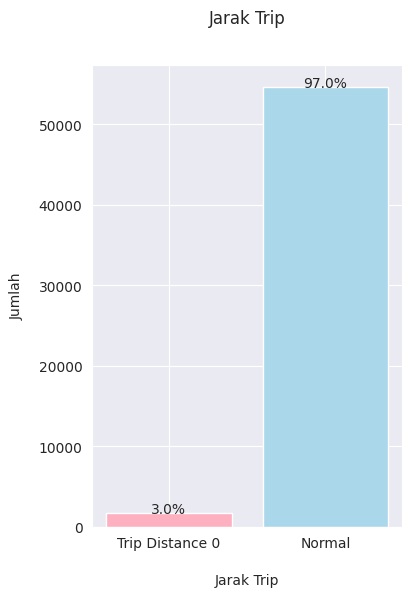

In [ ]:
sns.set_style('darkgrid')
colors = ['#FDB0C0','#ABD7EB']

plt.figure(figsize= (4, 6))
plt.title('Jarak Trip',pad=30)
plt.xlabel('Jarak Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.22, 0.5)

plt.bar(df_tripDist0['Trip_distance'], df_tripDist0['count'], color = colors)

total = sum(df_tripDist0['count'])
for i, v in enumerate(df_tripDist0['count']):
    percent = v / total * 100
    plt.text(i, v + 1, f'{percent:.1f}%', ha='center')

plt.show

Dari visualisasi diatas, didapatkan informasi:


*   Terdapat anomali pada data, yaitu Trip Distance 0 sebesar 3%.
*   Adanya kemungkinan taximeter pada beberapa taxi mengalami kerusakan sehingga ada beberapa perjalanan taxi yg memiliki jarak pengantaran 0.

Rekomendasi:

*  Melakukan pengecekan taxi secara berkala untuk menghindari kemungkinan kecurangan dari pihak supir taxi karena tidak terekamnya data pengukur jarak. Hal tersebut juga dapat menurunkan tingkat kepercayaan penumpang karena rusaknya taximeter.

## Berdasarkan Waktu Terbaik

In [ ]:
from datetime import datetime

df['day'] = pd.to_datetime(df['lpep_pickup_datetime']).apply(lambda x: datetime.strftime(x, '%A'))

In [ ]:
# Mencari hari paling banyak penumpang berdasarkan total trip
df_hari = df['day'].value_counts().reset_index().rename(columns={'index':'day','day':'day'})
df_hari

,day,count
0,Tuesday,9006
1,Thursday,8111
2,Friday,7998
3,Wednesday,7969
4,Monday,7904
5,Saturday,6939
6,Sunday,6741


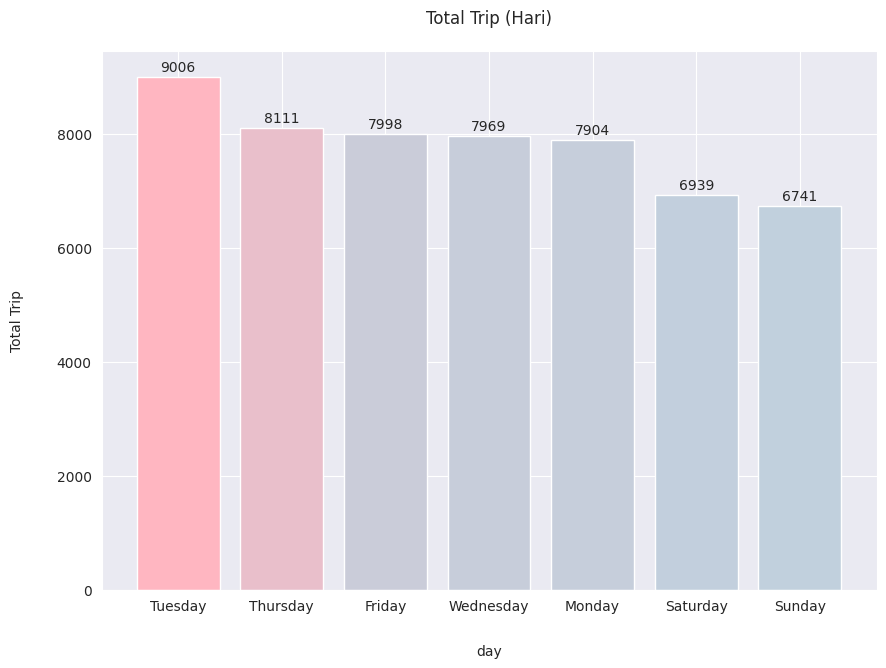

In [ ]:
sns.set_style('darkgrid')

normalized_heights = np.array(df_Top10Loc['count']) / max(df_Top10Loc['count'])
color_start = 'lightblue'
color_end = 'lightpink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (10, 7))
plt.title('Total Trip (Hari)',pad=20)
plt.xlabel('day',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.1, 0.5)

plt.bar(df_hari['day'], df_hari['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_hari['count']):
    plt.text(i, value + 100, str(value), ha='center')

plt.show()

Dari visualisasi diatas, didapatkan informasi:

*   Hari **selasa** merupakan hari yang paling banyak penumpang berdasarkan dari total trip.

In [ ]:
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df_jam = df['hour'].value_counts().reset_index().rename(columns={'index':'hour','hour':'hour'}).sort_values('hour',ascending=True)
df_jam = df_jam.reset_index(drop=True)
df_jam

,hour,count
0,0,947
1,1,740
2,2,518
3,3,469
4,4,346
5,5,313
6,6,690
7,7,1971
8,8,2446
9,9,2651


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/loc

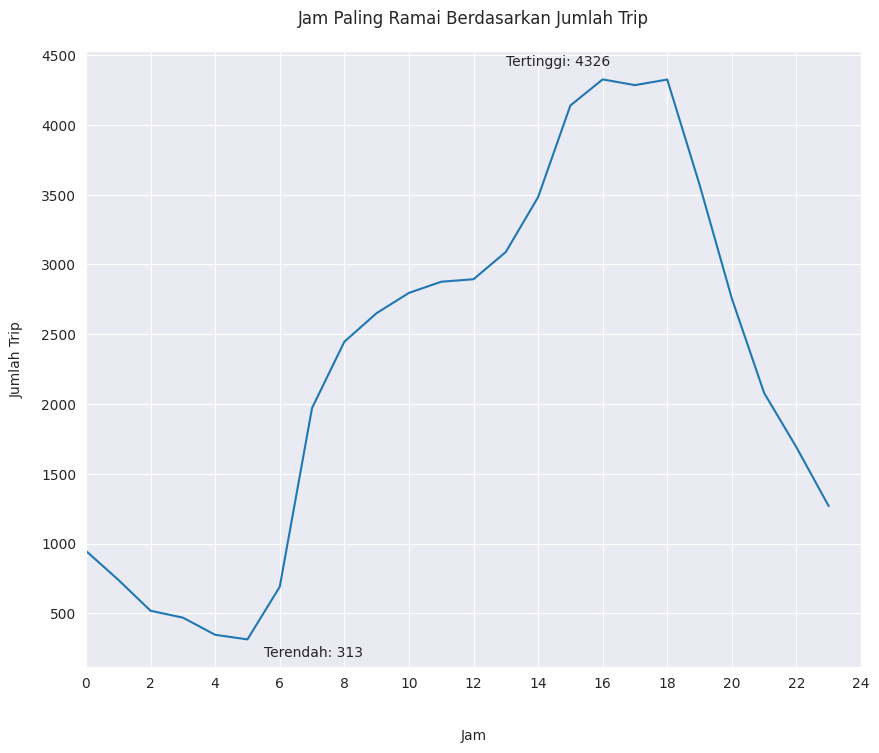

In [ ]:
# Menentukan jam paling ramai
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10,8))
plt.plot(df_jam['hour'],df_jam['count'])

plt.title('Jam Paling Ramai Berdasarkan Jumlah Trip',pad=20)
plt.xlabel('Jam',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.xlim(0, 24)
plt.xticks(range(0, 25, 2))

max_value = max(df_jam['count'])
min_value = min(df_jam['count'])

max_val1 = df_jam[df_jam['count'] == max_value]
min_val1 = df_jam[df_jam['count'] == min_value]

plt.annotate(f'Tertinggi: {max_value}', (max_val1['hour'], max_val1['count']),
             xytext=(max_val1['hour']-3, max_val1['count']+ 100))

plt.annotate(f'Terendah: {min_value}', (min_val1['hour'], min_val1['count']),
             xytext=(min_val1['hour']+0.5, min_val1['count']-120))


plt.show()

Dari visualisasi diatas, didapatkan informasi:

*   **Jam paling ramai** berdasarkan dari jumlah trip berada di **jam 12 siang hingga 20 malam.**
*   **Jam paling sepi** berdasarkan dari jumlah trip berada di **jam 0 dini hari hingga 6 pagi.**

Rekomendasi:

*   Memfokuskan pada jam paling ramai dengan menambah jumlah taxi di jam tersebut. Selain itu, jumlah taxi dapat dikurangi pada jam paling sepi.

*   Waktu yang paling ramai berdasarkan jumlah trip adalah pada hari Selasa pada pukul 12 siang hingga 20 malam sehingga perusahaan dapat mengalokasikan lebih banyak taxi pada waktu tersebut.

In [ ]:
from math import ceil

df['duration']=df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']
df['duration'].head()

# menghitung total menit dari durasi dan pembulatan detik ke menit
df['durationinMinutes'] = df['duration'].apply(lambda x: ceil(x.total_seconds() / 60))
df['durationinMinutes']

0        12
1         7
2         7
5        18
7        13
         ..
63882     8
63883    11
63884     7
63885    10
63886    10
Name: durationinMinutes, Length: 54668, dtype: int64

## Berdasarkan Passenger count >4 dan <=4

In [ ]:
df_passenger = df['passenger_count'].value_counts().reset_index().rename(columns={'index':'passenger_count','passenger_count':'passenger_count'})
df_passenger['passenger_count'] = df_passenger['passenger_count'].astype(int)
df_passenger['passenger_count'] = df_passenger['passenger_count'].astype(str)
df_passenger

,passenger_count,count
0,1,46462
1,2,4256
2,5,1761
3,6,1049
4,3,779
5,4,329
6,0,24
7,7,4
8,9,2
9,8,2


In [ ]:
df_passenger['passenger_count'] = df_passenger['passenger_count'].astype(int)
pasC_G4 = df_passenger['count'][df_passenger['passenger_count']>4].sum()
pasC_L4 = df_passenger['count'][df_passenger['passenger_count']<=4].sum()

print(pasC_G4)
print(pasC_L4)

2818
51850


In [ ]:
df_passenger['passenger_count'] = df_passenger['passenger_count'].astype(str)

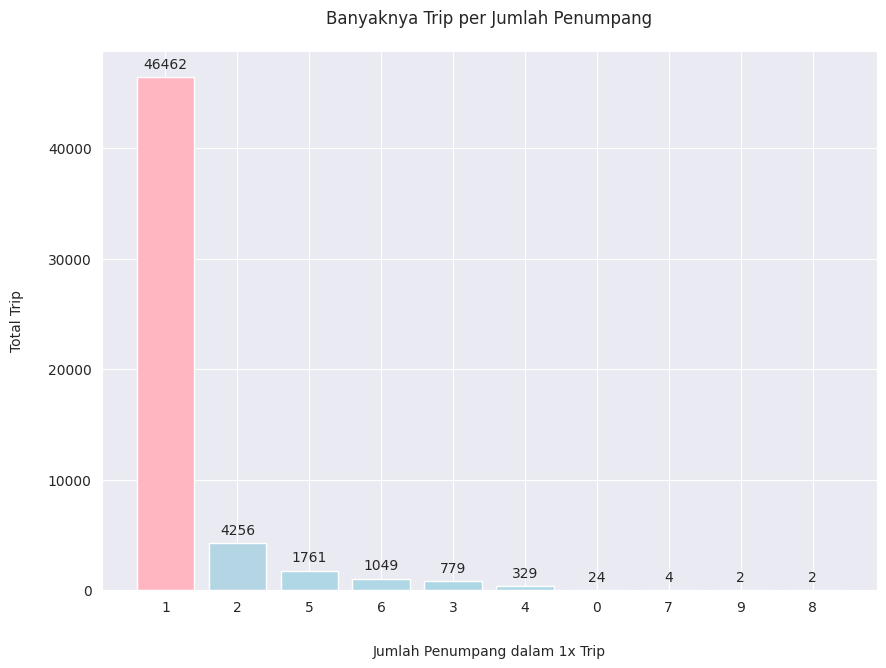

In [ ]:
sns.set_style('darkgrid')
normalized_heights = np.array(df_passenger['count']) / max(df_passenger['count'])
color_start = 'lightblue'
color_end = 'lightpink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (10, 7))
plt.title('Banyaknya Trip per Jumlah Penumpang',pad=20)
plt.xlabel('Jumlah Penumpang dalam 1x Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.1, 0.5)

plt.bar(df_passenger['passenger_count'], df_passenger['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_passenger['count']):
    plt.text(i, value + 800, str(value), ha='center')

plt.show()

Dari visualisasi diatas, didapatkan informasi:

*   jumlah trip yang hanya berisi 1 penumpang dalam 1 trip menjadi yang paling banyak dengan 46,462 trip.

In [ ]:
df_passenger_gr_ls = pd.DataFrame({
    'Passenger' : ['Greater than 4','Less than 4'],
    'count' : [pasC_G4,pasC_L4]
})
df_passenger_gr_ls

,Passenger,count
0,Greater than 4,2818
1,Less than 4,51850


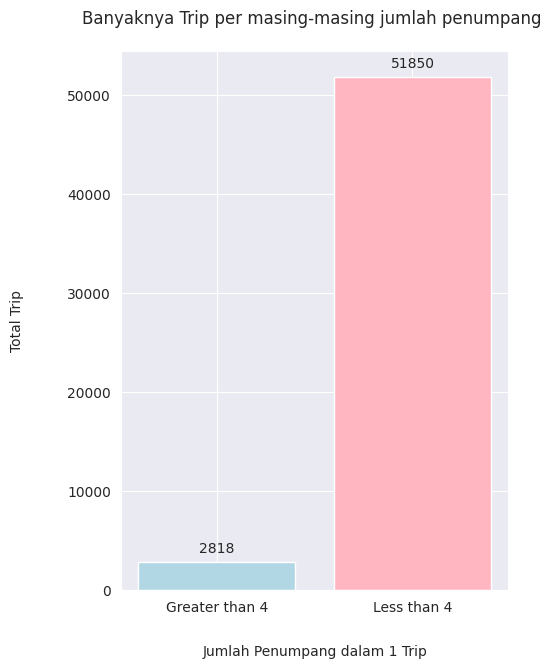

In [ ]:
# Menghitung skala warna berdasarkan nilai
normalized_heights = np.array(df_passenger_gr_ls['count']) / max(df_passenger_gr_ls['count'])
color_start = 'lightblue'
color_end = 'lightpink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (5, 7))
plt.title('Banyaknya Trip per masing-masing jumlah penumpang ',pad=20)
plt.xlabel('Jumlah Penumpang dalam 1 Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.25, 0.5)

plt.bar(df_passenger_gr_ls['Passenger'], df_passenger_gr_ls['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_passenger_gr_ls['count']):
    plt.text(i, value + 1000, str(value), ha='center')

plt.show()

Dari visualisasi diatas, didapatkan informasi:

*   Jumlah penumpang dalam 1 taxi per 1x trip paling banyak adalah < 4 penumpang. Akan tetapi, masih terdapat sekitar 5% untuk jumlah penumpang dalam 1 taxi per 1x trip yang lebih dari 4 orang.

In [ ]:
df['passenger_count'] = df['passenger_count'].astype(int)
df_locationPsg_G4 = df[['PULocationID']] [df['passenger_count']>4].value_counts().reset_index().head(10).rename(columns={0:'count'})
df_locationPsg_G4['PULocationID'] = df_locationPsg_G4['PULocationID'].astype(str)
df_locationPsg_G4

,PULocationID,count
0,74,576
1,75,570
2,166,186
3,95,183
4,41,152
5,43,145
6,244,128
7,82,117
8,260,98
9,7,81


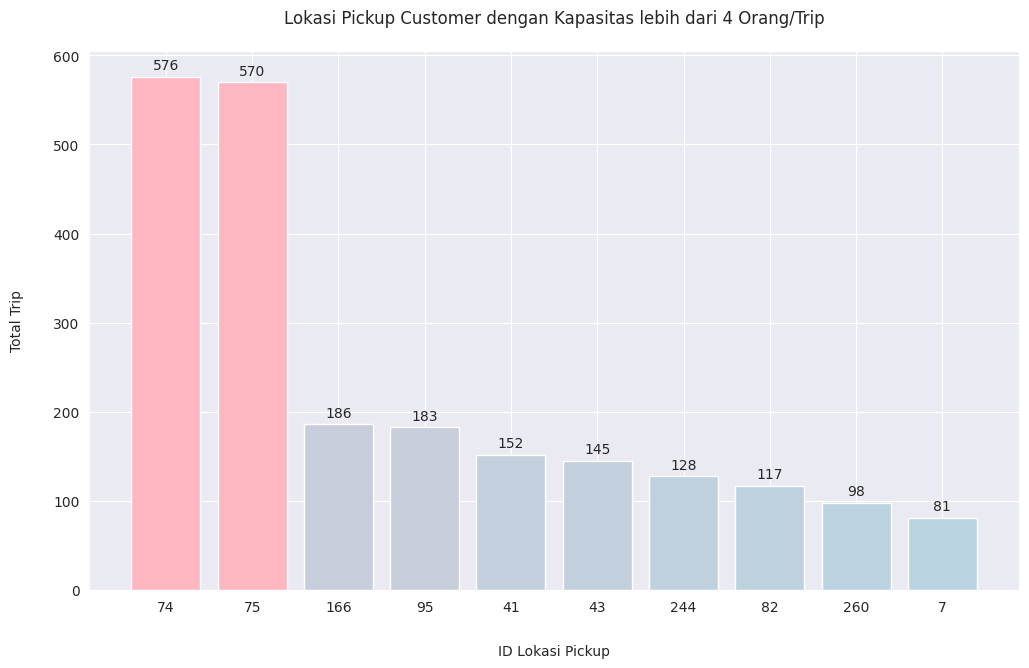

In [ ]:
# Lokasi Penjemputan Penumpang yang lebih dari 4 Orang dalam 1 taksi per 1x trip

normalized_heights = np.array(df_locationPsg_G4['count']) / max(df_locationPsg_G4['count'])
color_start = 'lightblue'
color_end = 'lightpink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (12, 7))

plt.title('Lokasi Pickup Customer dengan Kapasitas lebih dari 4 Orang/Trip', pad=20)
plt.xlabel('ID Lokasi Pickup',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.07, 0.5)

plt.bar(df_locationPsg_G4['PULocationID'], df_locationPsg_G4['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_locationPsg_G4['count']):
    plt.text(i, value + 8, str(value), ha='center')

plt.show()

Dari visualisasi diatas, didapatkan informasi:

*   ID lokasi pickup 74 dan 75 adalah lokasi yang memiliki jumlah trip terbanyak dengan jumlah customer lebih dari 4 orang per 1x trip nya.

Rekomendasi:

*   Dapat difokuskan untuk Taxi dengan kapasitas lebih dari 4 orang di lokasi-lokasi ini.

## Berdasarkan Income

In [ ]:
# Pendapatan per Tahun
incomePerYear = df.groupby(df['lpep_dropoff_datetime'].dt.year)['total_amount'].sum()
incomePerYear

lpep_dropoff_datetime
2023    1161159.29
Name: total_amount, dtype: float64

In [ ]:
# Pendapatan per Bulan
incomePerMonth = df.groupby(df['lpep_dropoff_datetime'].dt.month)['total_amount'].sum()
incomePerMonth

lpep_dropoff_datetime
1    1160882.39
2        276.90
Name: total_amount, dtype: float64

In [ ]:
df_amountIn2023 = df[['lpep_dropoff_datetime','total_amount']][df['lpep_dropoff_datetime'].dt.year == 2023]
df_amountIn2023

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


In [ ]:
df_amountJan2023 = df_amountIn2023[df_amountIn2023['lpep_dropoff_datetime'].dt.month == 1]
df_amountJan2023

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


Dari visualisasi diatas, didapatkan informasi:

*   Terdapat perbedaan Income dari Total Amount pada tahun 2023 dengan bulan Januari 2023. Oleh karena itu, mari kita lanjutkan pengecekan income menjadi per minggu agar dapat melihat lebih detail.

In [ ]:
# Pendapatan per Minggu
dfInWeek = df_amountJan2023[['lpep_dropoff_datetime','total_amount']]

dfInWeek['lpep_dropoff_datetime'] = pd.to_datetime(dfInWeek['lpep_dropoff_datetime'])

incomeInWeekly = dfInWeek.groupby(pd.Grouper(key='lpep_dropoff_datetime', freq='W-MON')).sum().reset_index()
incomeInWeekly['lpep_dropoff_datetime'] = incomeInWeekly['lpep_dropoff_datetime'].astype(str)
incomeInWeekly

,lpep_dropoff_datetime,total_amount
0,2023-01-02,51483.72
1,2023-01-09,260190.50
2,2023-01-16,260546.01
3,2023-01-23,271799.21
4,2023-01-30,276942.30
5,2023-02-06,39920.65


In [ ]:
incomeInWeekly = incomeInWeekly.iloc[1:5]

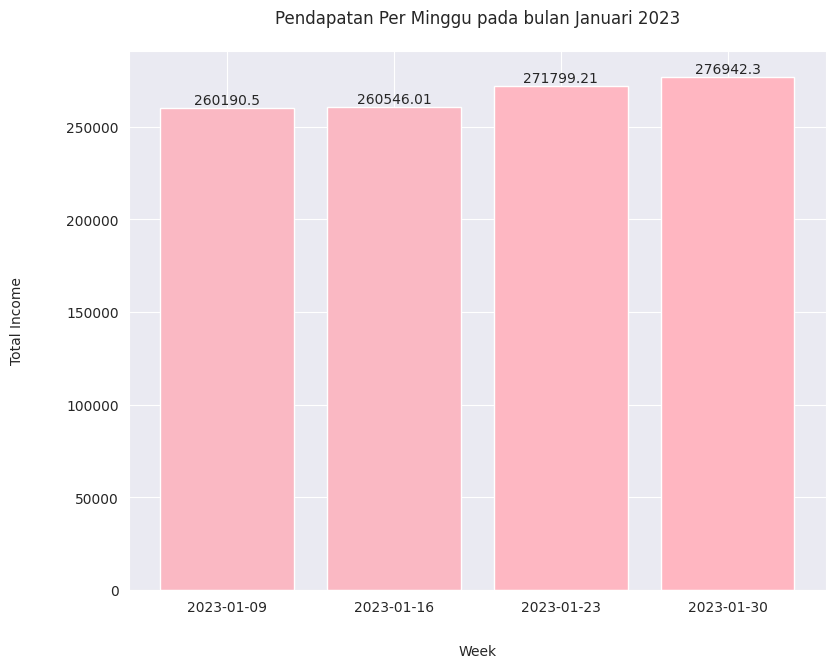

In [ ]:
normalized_heights = np.array(incomeInWeekly['total_amount']) / max(incomeInWeekly['total_amount'])
color_start = 'lightblue'
color_end = 'lightpink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (9, 7))

plt.bar(incomeInWeekly['lpep_dropoff_datetime'], incomeInWeekly['total_amount'], color=cmap(normalized_heights))

plt.title('Pendapatan Per Minggu pada bulan Januari 2023',pad=20)
plt.xlabel('Week',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Income',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.15, 0.5)


for i, value in enumerate(incomeInWeekly['total_amount']):
    plt.text(i, value + 2000, str(value), ha='center')

plt.show()

Dari visualisasi diatas, didapatkan informasi:

*   Terdapat sedikit peningkatan income setiap minggunya pada bulan Januari 2023.

##Berdasarkan Trip Duration

In [ ]:
# Hitung trip duration
df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

In [ ]:
print(df['trip_duration'])

0       0 days 00:11:01
1       0 days 00:06:46
2       0 days 00:06:20
5       0 days 00:17:33
7       0 days 00:12:57
              ...      
63882   0 days 00:07:59
63883   0 days 00:10:45
63884   0 days 00:06:01
63885   0 days 00:09:32
63886   0 days 00:09:56
Name: trip_duration, Length: 54668, dtype: timedelta64[ns]


In [ ]:
print(max(df['trip_duration']))

0 days 23:59:53


In [ ]:
# Hitung trip duration dalam Jam, Hari, dan Menit
df['trip_duration_hours'] = df['trip_duration'] // pd.Timedelta(hours=1)
df['trip_duration_days'] = df['trip_duration'] // pd.Timedelta(days=1)
df['trip_duration_minutes'] = df['trip_duration'] // pd.Timedelta(minutes=1)

In [ ]:
df['trip_duration_float'] = df['trip_duration']/pd.Timedelta(hours=1)
df['trip_duration_float']

0        0.183611
1        0.112778
2        0.105556
5        0.292500
7        0.215833
           ...   
63882    0.133056
63883    0.179167
63884    0.100278
63885    0.158889
63886    0.165556
Name: trip_duration_float, Length: 54668, dtype: float64

In [ ]:
df['trip_avg_speed'] = df['trip_distance']/df['trip_duration_float']

In [ ]:
trips_23_hours = df[df['trip_duration_hours'] == 23]

In [ ]:
show_columns = ['PULocationID','DOLocationID','lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration_hours','trip_distance','trip_avg_speed']

trips_23_hours_sorted = trips_23_hours.sort_values(by='trip_avg_speed', ascending=False)
trips_23_hours_sorted[show_columns]

,PULocationID,DOLocationID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration_hours,trip_distance,trip_avg_speed
60824,75,26,2023-01-30 15:12:02,2023-01-31 14:40:39,23,15.17,0.646166
37140,43,17,2023-01-19 15:46:39,2023-01-20 15:42:15,23,11.34,0.473948
6049,75,220,2023-01-04 16:45:02,2023-01-05 16:05:37,23,10.69,0.457952
3989,43,217,2023-01-03 16:29:21,2023-01-04 16:16:30,23,9.07,0.381319
45668,66,236,2023-01-23 16:14:35,2023-01-24 15:48:57,23,8.81,0.373736
...,...,...,...,...,...,...,...
54649,193,193,2023-01-27 12:45:42,2023-01-28 12:43:38,23,0.00,0.000000
18847,75,74,2023-01-10 17:26:06,2023-01-11 17:00:54,23,0.00,0.000000
38200,193,193,2023-01-19 20:12:15,2023-01-20 20:11:25,23,0.00,0.000000
2130,193,193,2023-01-02 15:46:00,2023-01-03 15:45:15,23,0.00,0.000000


diasumsikan kecepatan normal adalah 40km/jam atau 24mil/jam, maka

In [348]:
# Dengan asumsi telah memfilter DataFrame untuk hanya menyertakan perjalanan dengan durasi 23 jam
# dan Anda ingin menghitung kemunculan 'trip_avg_speed' di bawah 24 dan lebih dari 24 dalam trip ini

# Buat boolean mask untuk 'trip_avg_speed' di bawah 24 dan lebih dari 24
below_24_mask = trips_23_hours['trip_avg_speed'] < 24
above_24_mask = trips_23_hours['trip_avg_speed'] >= 24

# Hitung Kejadian
below_24_count = below_24_mask.sum()
above_24_count = above_24_mask.sum()

In [349]:

df_speed_counts = pd.DataFrame({
    'Trip Average Speed': ['Below 24', 'More than or equal to 24'],
    'count': [below_24_count, above_24_count]
})

df_speed_counts

,Trip Average Speed,count
0,Below 24,139
1,More than or equal to 24,0


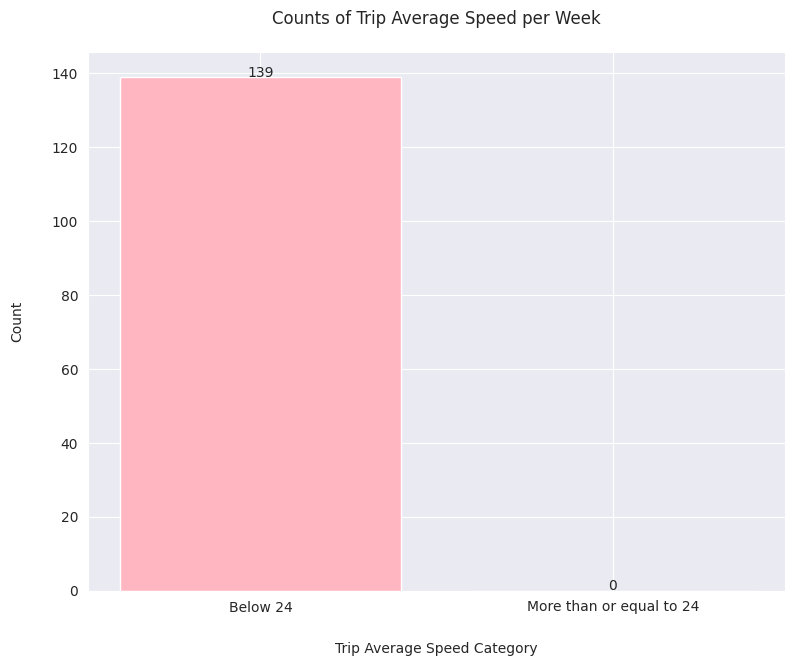

In [ ]:
speed_categories = ['Below 24', 'More than or equal to 24']
counts = [below_24_count, above_24_count]

normalized_counts = np.array(counts) / max(counts)

color_start = 'lightblue'
color_end = 'lightpink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize=(9, 7))
bars = plt.bar(speed_categories, counts, color=cmap(normalized_counts))

plt.title('Counts of Trip Average Speed per Week', pad=20)
plt.xlabel('Trip Average Speed Category', labelpad=20)
plt.ylabel('Count', labelpad=20)

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), ha='center')

plt.show()

Dari Analisis diatas, didapatkan informasi:


*   Durasi trip paling lama adalah 23 jam
*   Terdapat 139 trip yang durasi nya 23 jam
*   dilihat berdasarkan distance dan kecepatan mil/jam nya, jika diasumsikan kecepatan normal adalah 40km/jam = sekitar 24 mil/jam, dari 139 trip tersebut, maka semua trip kurang dari 24 mil/jam.
*   Perjalanan dengan lama durasi selama 23 Jam dan dengan kecepatan 24 mil/jam adalah tidak normal, sehingga perlu dilihat lebih lanjut.

Rekomendasi:

*   Melakukan pengecekan rutin mengenai keakuratan taximeter pada setiap taxi
*   Dapat dilakukan pengecekan kemacetan dalam perjalanan yang mungkin menyebabkan lamanya durasi trip.



# Kesimpulan dan Rekomendasi

## Kesimpulan

* Data yang digunakan dalam proses analisis adalah data pada bulan Januari 2023.
* Terdapat lokasi penjemputan yang kurang efektif sebesar 48.4%.
* Id Lokasi Pickup 74 merupakan jumlah trip tertinggi dengan jumlah trip sebanyak 10,565 kali.
* Terdapat sebanyak 18 lokasi berbeda yang hanya memiliki jumlah 1 trip yang dapat dikategorikan kurang efektif.
* Jumlah Trip Dispatch sangat sedikit (2.4%) jika dibandingkan dengan Street-hail.
* Terdapat anomali pada data, yaitu Trip Distance 0 sebesar 3%.Adanya kemungkinan taximeter pada beberapa taxi mengalami kerusakan sehingga ada beberapa perjalanan taxi yg memiliki jarak pengantaran 0.
* Hari selasa merupakan hari yang paling banyak penumpang, sedangkan hari minggu merupakan hari yang paling sedikit penumpang.
* Jam paling ramai dari jumlah trip mulai dari jam 12 siang hingga 20 malam. Sedangkan jam paling sepi dari jumlah trip dari jam 0 dini hari hingga 6 pagi.
* jumlah penumpang yang hanya berisi 1 penumpang dalam 1x Trip menjadi yang paling banyak dengan 46,462 orang.
* ID lokasi pickup 74 dan 75 adalah lokasi yang memiliki jumlah trip terbanyak dengan jumlah customer lebih dari 4 orang dalam 1x trip.
* Terdapat sedikit peningkatan income setiap minggunya pada bulan Januari 2023.
* Durasi trip paling lama adalah 23 jam dengan jumlah 139 trip.
* Perjalanan dengan lama durasi selama 23 Jam dan dengan kecepatan 24 mil/jam adalah tidak normal, sehingga perlu dilihat lebih lanjut.


## Rekomendasi

* Mengalokasikan taxi ke lokasi pick up yang ramai (ID Lokasi Pickup 74) untuk meningkatkan efesiensi trip dan profit perusahaan.
* Menghindari lokasi area yang sepi penumpang untuk meningkatkan efektivitas trip dan profit perusahaan.
* Meningkatkan peforma dan kualitas aplikasi taxi untuk menaikkan profit dan efektivitas.
* Memfokuskan pada jam paling ramai yaitu pada pukul 12 siang hingga 20 malam terutama pada hari teramai yaitu hari Selasa.
* Dapat difokuskan pada ID Lokasi Pickup 74 dan 75 untuk jumlah penumpang lebih dari 4 orang per trip karena memiliki jumlah trip terbanyak dibanding yang lain.
* Melakukan pengecekan rutin mengenai keakuratan taximeter pada setiap taxi.
* Dapat dilakukan pengecekan kemacetan dalam perjalanan yang mungkin menyebabkan lamanya durasi trip.
